<a href="https://colab.research.google.com/github/rawat999/Audio_Analytics/blob/master/Audio_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [2]:
voice_file_name = "/content/6829_00000.mp3"

Waveform

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


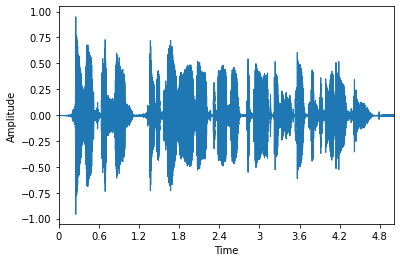

In [10]:
signal, sr = librosa.load(voice_file_name, sr=22050) # sr * T =>  22050 * 5 (approx size of signal)
librosa.display.waveplot(signal, sr = sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# warning because of loading mp3 file

Fouries transform and spectrum

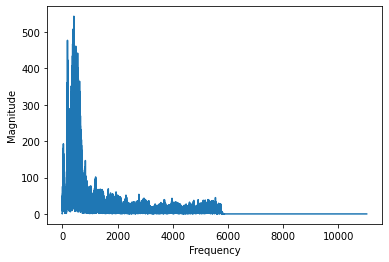

In [13]:
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_magnitude = magnitude[:int(len(magnitude)/2)]
left_frequency = frequency[:int(len(frequency)/2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

Short time fouries transform

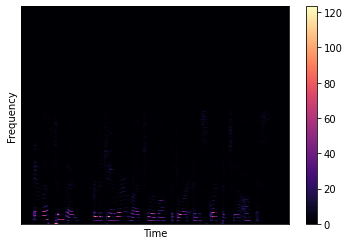

In [14]:
n_fft = 2048
hop_length = 512

stft = librosa.core.stft(signal,n_fft=2048, hop_length=hop_length)

spectrogram = np.abs(stft)

librosa.display.specshow(spectrogram, sr = sr, hop_length= hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

Log spectrogram

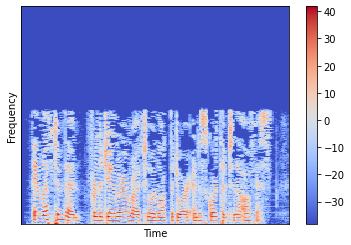

In [15]:
n_fft = 2048
hop_length = 512

stft = librosa.core.stft(signal,n_fft=2048, hop_length=hop_length)

spectrogram = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr = sr, hop_length= hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

MFCCs

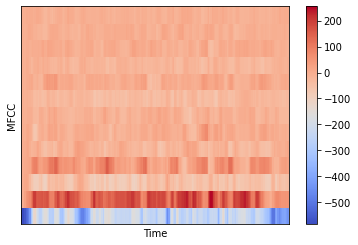

In [17]:
mfcc = librosa.feature.mfcc(signal, n_fft = n_fft, hop_length=hop_length, n_mfcc=13)

librosa.display.specshow(mfcc, sr = sr, hop_length= hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()